# Jester Jokes Recommanded System

### Using Collaborative,Content-based and Hybrid System recommended Methods to recommand jokes

## Step 1: Import Packages and Set PATH

In [141]:
# import package and set PATH
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
Path=r'C:/Users/陈建梅/Desktop/JesterRecommenderSystem-master/DatasetFull/'

## Step 2: Load the required datasets and Integrated datasets

In [54]:
# load datasets 
# 第一列给出了该用户所评价的笑话数量,表示本条数据在-10<rating<10的有效值。

# 1. dataset1：记录1999.4到2003.5，对100个笑话的rating，rating只是包含（-10到10，99）
# rating=99表示毫不相关的jokes
# 24983人：有效评分>36
dataset1_1=pd.read_excel(Path+'jester-data-1.xls',header=None)
# 23500人：有效评分>36
dataset1_2=pd.read_excel(Path+'jester-data-2.xls',header=None)
# 24,938 人：15<有效评分<35
dataset1_3=pd.read_excel(Path+'jester-data-3.xls',header=None)
dataset1=dataset1_1.append(dataset1_2).append(dataset1_3)
dataset1.index=range(dataset1.shape[0])

# 2. dataset2：记录2006.11到2012.11，对150个（前100个笑话与data1重复）笑话的rating，rating只是包含（-10到10，99）
dataset2=pd.read_table(Path+'jester_ratings.dat',header=None)
dataset2=dataset2.drop([1,3],axis=1)
dataset2= dataset2.pivot(0,2,4)
concluedcolumns=list(dataset2.columns)
addcolumns=[i for i in list(range(1,151)) if i not in list(dataset2.columns) ]
dataset2[addcolumns]=  np.nan
dataset2[0]=dataset2.count(axis=1)#count统计不为nan的值的个数
dataset2=dataset2.fillna(99)
dataset2=dataset2.sort_index(axis=1)#列排序
dataset2.columns.name=None
dataset2.index.name=None
# 59,132人，人员标号到63978，有缺失.151列150条笑话
dataset2


# 3. dataset2+：dataset2的补充，记录2006.11到2015.3，对150个笑话的rating
# 54905人，151列150条笑话
dataset3=pd.read_excel(Path+'jesterfinal151cols.xls',header=None)
dataset3=dataset3.fillna(99)
dataset2=dataset2.append(dataset3)
dataset2.index=range(dataset2.shape[0])

# 整理得到：两组数据
# 1999.4-2003.5,100条笑话，73421 人
dataset1=dataset1.rename(columns={0:'NumofRatedJokes'})
# 2006.11-2015.3,150条笑话，11,109824人
dataset2=dataset2.rename(columns={0:'NumofRatedJokes'})
dataset2


# 导处实验数据
dataset1.to_csv(Path+'1999.4-2003.5,73421x100.csv',index=False)
dataset2.to_csv(Path+'2006.11-2012.11,109824x150.csv',index=False)

#### explaination of datasets:
#### dataset_rating100_orgin: From 1999.4-2003.5, the rating data for 100jokes;
#### dataset_rating100: The rating data for jokes with indexs 0-100, including the rating data in 1999.4-2003.5 and 2006.11-2012.11
#### dataset_rating50: The rating data for jokes with indexs 101-150, From 2006.11-2012.11
#### data_rating: The rating data for all required datasets

In [58]:

dataset_rating100=pd.read_csv(Path+'1999.4-2003.5,73421x100.csv')
dataset_rating150=pd.read_csv(Path+'2006.11-2012.11,109824x150.csv')
dataset_rating100=dataset_rating100.drop(['NumofRatedJokes'],axis=1)
dataset_rating150=dataset_rating150.drop(['NumofRatedJokes'],axis=1)
dataset_rating100[dataset_rating100==99]=np.nan
dataset_rating150[dataset_rating150==99]=np.nan

# 加载jokes
dataset_jokes=pd.read_excel(Path+'Dataset3JokeSet.xlsx',header=None)
dataset_jokes["jokes_id"]=dataset_jokes.index+1
dataset_jokes.columns=["jokes_describ","jokes_id"]
dataset_jokes=dataset_jokes.loc[:,["jokes_id","jokes_describ"]]
dataset_jokes.loc[100:150,'jokes_describ'].to_csv(Path+'/Jestertext1.txt',index=False)# 输出150个笑话

In [11]:
dataset_rating100_orgin=dataset_rating100.copy()# dataset1的数据
dataset_rating100=dataset_rating100.append(dataset_rating150.iloc[:,:100])#(183245, 100) 前一百个笑话的评价
dataset_rating50=dataset_rating150.iloc[:,100:150]#后五十个笑话的评价
data_rating=dataset_rating100_orgin.append(dataset_rating150)

,101,102,103,104,105,106,107,108,109,110,...,141,142,143,144,145,146,147,148,149,150
0,NaN,0.750,-5.0,2.93800,2.0000,-0.15600,2.031,5.68800,9.656,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.344,NaN,NaN,1.2500,NaN,NaN,NaN,-9.812,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-7.906,3.812,NaN,1.43800,NaN,NaN,NaN,NaN,0.312,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.15625,NaN,-1.1875
109820,NaN,NaN,NaN,NaN,NaN,4.21875,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.06250,NaN,NaN
109821,NaN,NaN,NaN,0.68750,NaN,0.46875,NaN,-0.21875,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109822,NaN,NaN,NaN,0.03125,9.9375,-1.03125,NaN,1.84375,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 3: Analyst the rating dataset and draw plots
### the average score for each joke ,
### the distribution of the average score of 150 jokes 
### the rated frequency of each joke (valid rating score/number of ratings in the table)

In [28]:
# 求平均分
# 每一个笑话的平均分
joke_ratingAvg=dataset_rating100.mean(axis=0).append(dataset_rating50.mean(axis=0))
# 每一个用户的打分平均分
user_ratingAvg=dataset_rating100_orgin.mean(axis=1).append(dataset_rating150.mean(axis=1))
# # 求rating的平均分
jokesFull_ratingAvg=joke_ratingAvg.mean()

# # 求每一个笑话的rating频率，频数/shape
jokes_ratingFreq=(dataset_rating100.count(axis=0, level=None, numeric_only=True)/dataset_rating100.shape[0]).append(dataset_rating50.count(axis=0, level=None, numeric_only=True)/dataset_rating50.shape[0])
np.max(joke_ratingAvg)
np.min(joke_ratingAvg)


183245

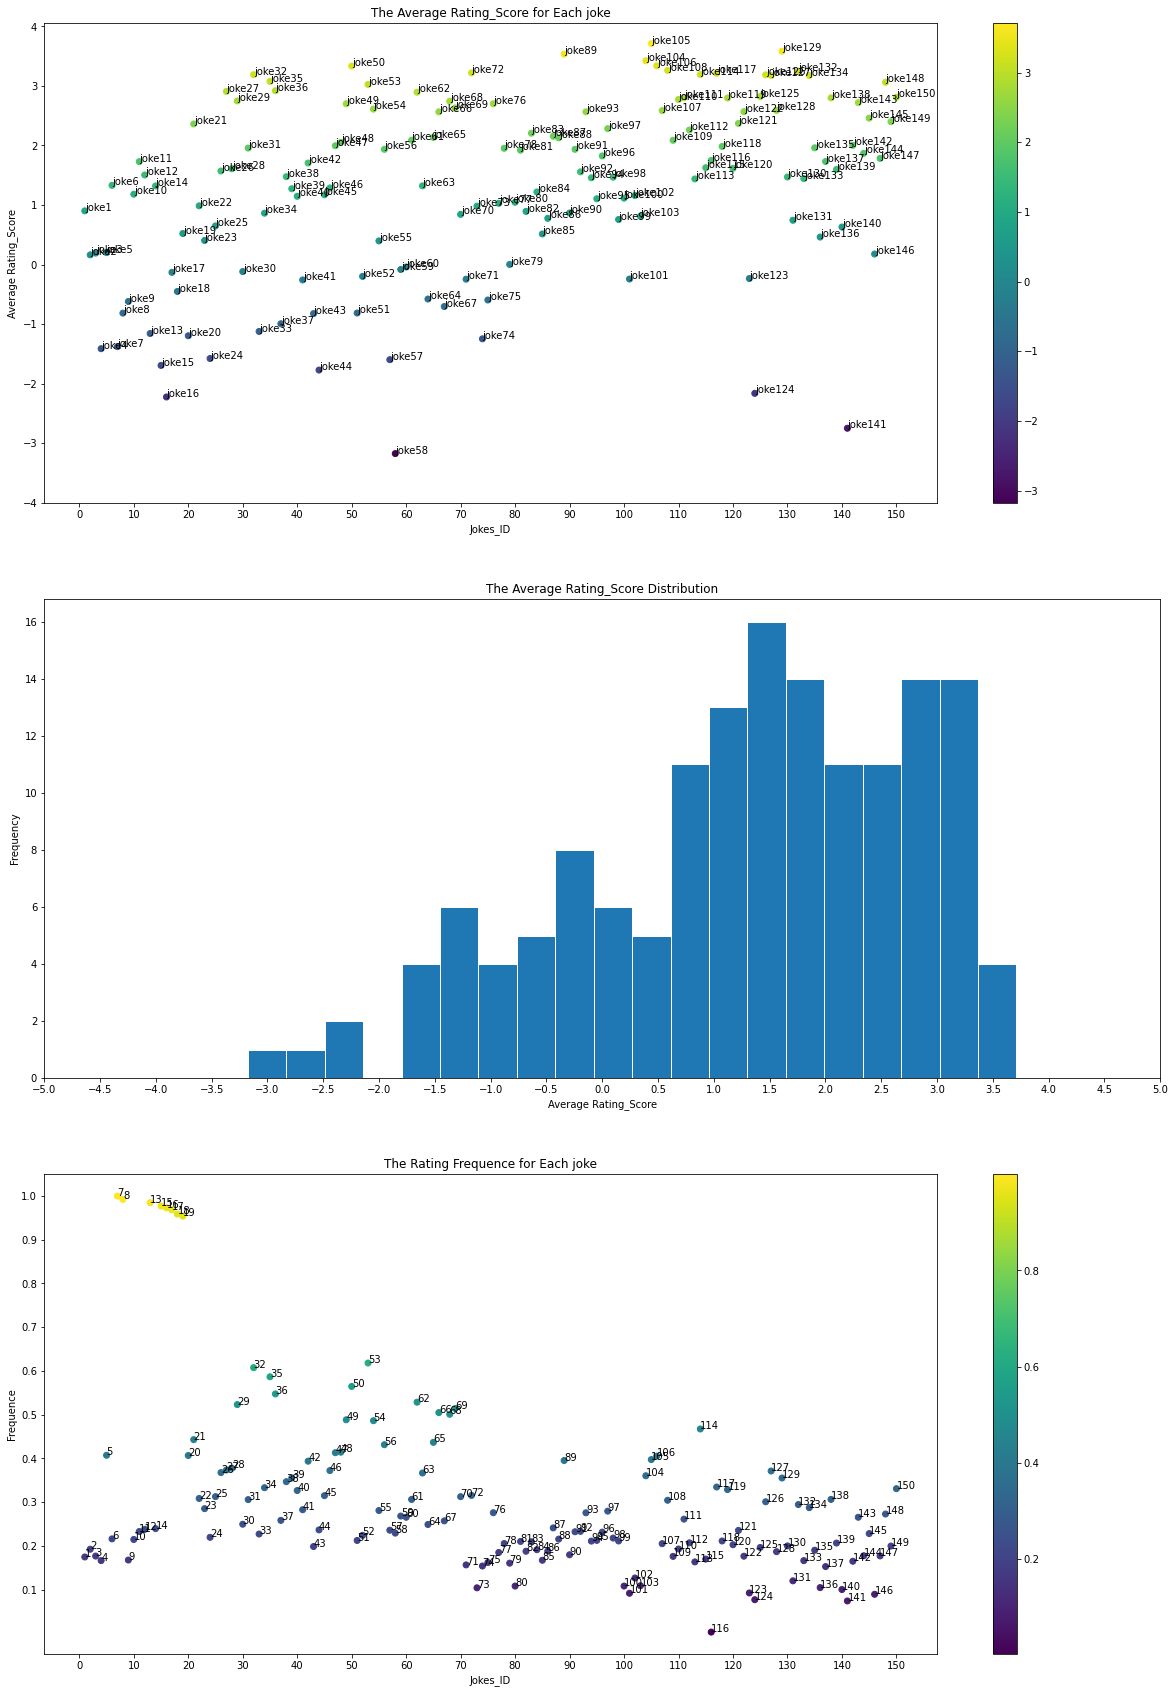

In [29]:
# 做图： 
fig=plt.figure(figsize=(20,30))
ax1=fig.add_subplot(3,1,1)
props={
    'title':'The Average Rating_Score for Each joke',
    'xlabel':'Jokes_ID',
    'ylabel':'Average Rating_Score',
    'xticks':[10*i for i in range(0,16,1)],
    'yticks':[-4,-3,-2,-1,0,1,2,3,4],
}
# df.plot.scatter(x='column_name',y='column_name', c='column_name',ax=ax1)
sc=ax1.scatter(range(1,151), joke_ratingAvg, c=joke_ratingAvg )
plt.colorbar(sc)
ax1.set(**props)
ax1.title.set_size=20
# ax1.set_label({'size':40})
# 注释点
for label,date in list(zip(range(1,151),list(zip(range(1,151), joke_ratingAvg)))):
    ax1.annotate('joke'+str(label),xy=date, fontsize=10)
    

ax2=fig.add_subplot(3,1,2)

ax2.hist(joke_ratingAvg, bins=20, edgecolor="white")
ax2.set_xticks(np.arange(-5, 5.5, 0.5))
ax2.set_title("The Average Rating_Score Distribution")
ax2.set_xlabel("Average Rating_Score")
ax2.set_ylabel("Frequency")

ax3=fig.add_subplot(3,1,3)

props3={
    'title':'The Rating Frequence for Each joke',
    'xlabel':'Jokes_ID',
    'ylabel':'Frequence',
    'xticks':[10*i for i in range(0,16,1)],
    'yticks':[i for i in np.arange(0.1,1.1,0.1)]
}
# df.plot.scatter(x='column_name',y='column_name', c='column_name',ax=ax1)
sc3=ax3.scatter(range(1,151), jokes_ratingFreq, c=jokes_ratingFreq)
plt.colorbar(sc3)
ax3.set(**props3)
ax3.title.set_size=20
# ax1.set_label({'size':40})
# 注释点
for label,date in list(zip(range(1,151),list(zip(range(1,151), jokes_ratingFreq)))):
    ax3.annotate(str(label),xy=date,xytext=date, fontsize=10)


we can know that：jokes [7,8,13,15,16,17,18,19] is dense,and then we plot the distribution of rating score of these jokes.

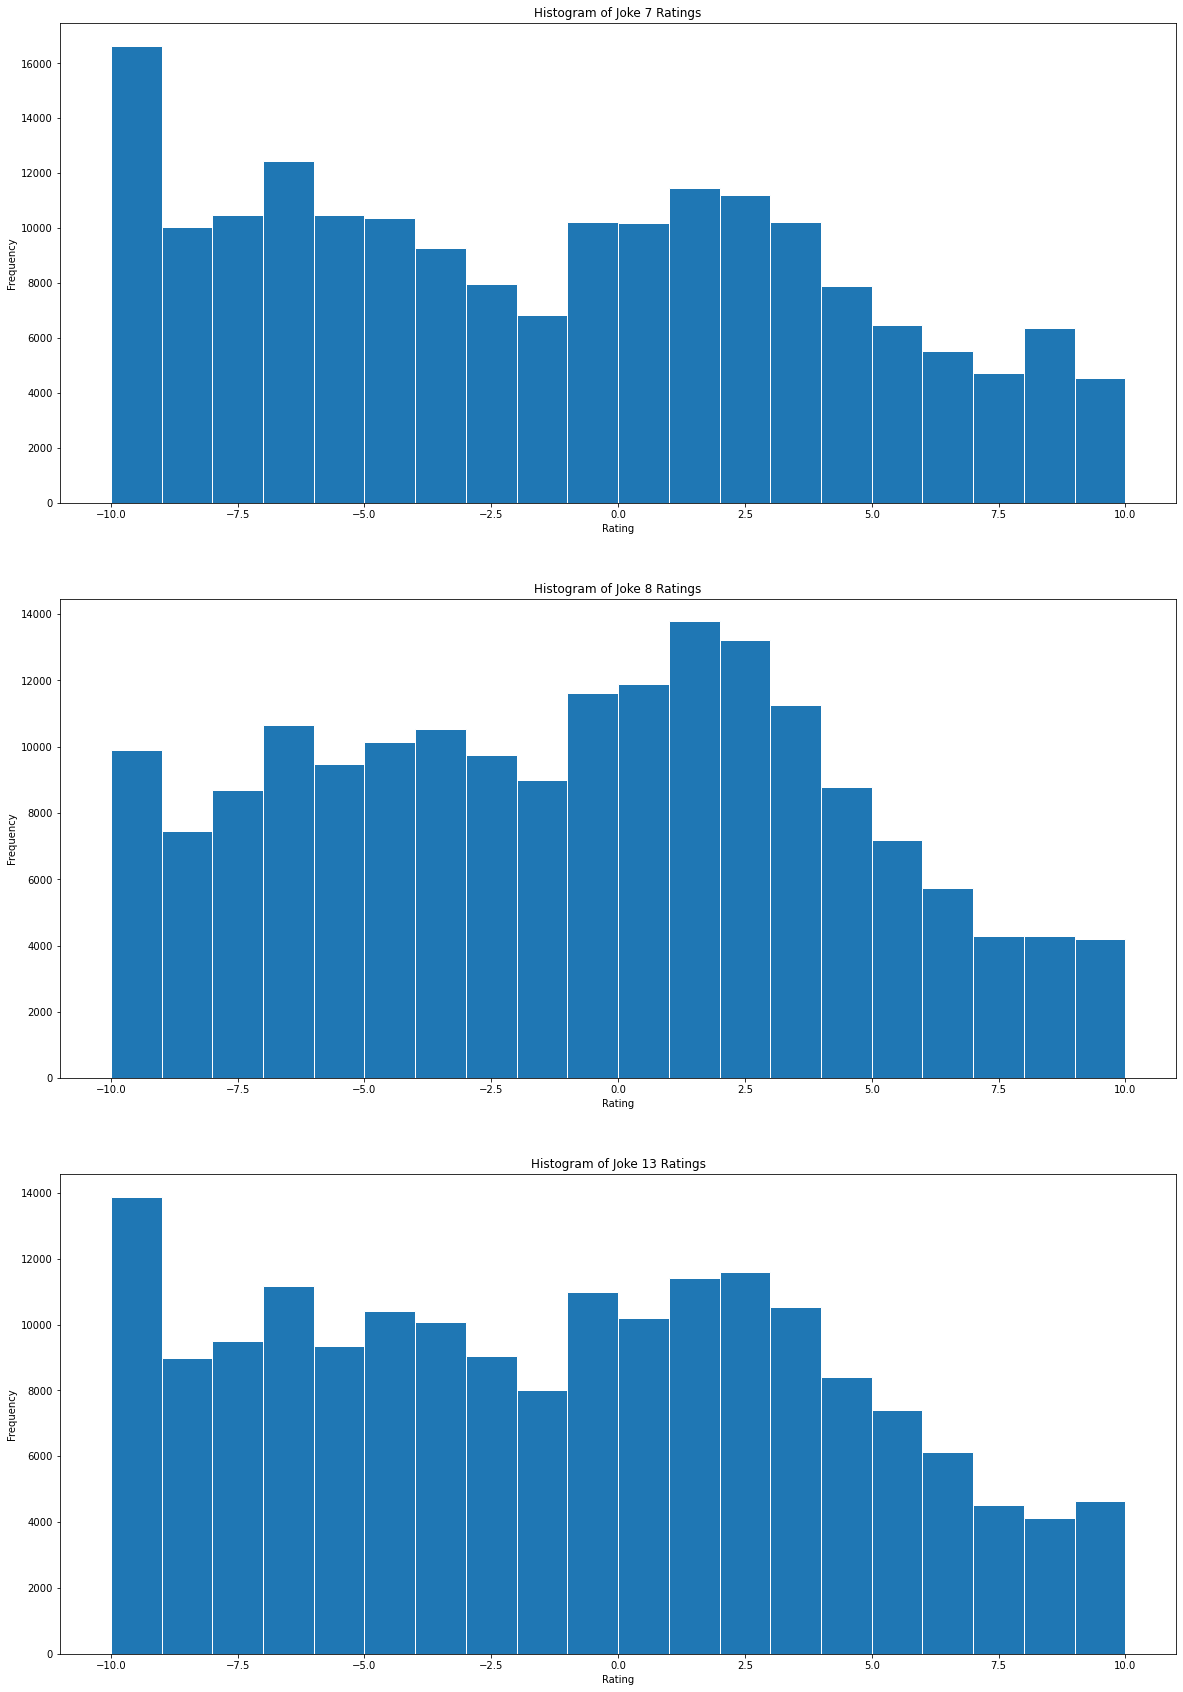

In [138]:
fig=plt.figure(figsize=(20,30))


joke7_ratings = data_rating["7"].to_numpy()
joke7_ratings = joke7_ratings[~np.isnan(joke7_ratings)]

joke8_ratings = data_rating["8"].to_numpy()
joke8_ratings = joke8_ratings[~np.isnan(joke8_ratings)]

joke13_ratings = data_rating["13"].to_numpy()
joke13_ratings = joke13_ratings[~np.isnan(joke13_ratings)]

ax4=fig.add_subplot(3,1,1)
ax4.hist(joke7_ratings, bins=20, edgecolor="white")
ax4.set_title("Histogram of Joke 7 Ratings")
ax4.set_ylabel("Frequency")
ax4.set_xlabel("Rating")

ax5=fig.add_subplot(3,1,2)
ax5.hist(joke8_ratings, bins=20, edgecolor="white")
ax5.set_title("Histogram of Joke 8 Ratings")
ax5.set_ylabel("Frequency")
ax5.set_xlabel("Rating")

ax6=fig.add_subplot(3,1,3)
ax6.hist(joke13_ratings, bins=20, edgecolor="white")
ax6.set_title("Histogram of Joke 13 Ratings")
ax6.set_ylabel("Frequency")
ax6.set_xlabel("Rating");

So we have the average rating, but we don't know if the data is independently sorted. As in, the data collectors could've sorted the data by some metric beforehand, which could effect our results, particularly if we choose a specific holdout set for evaluation.

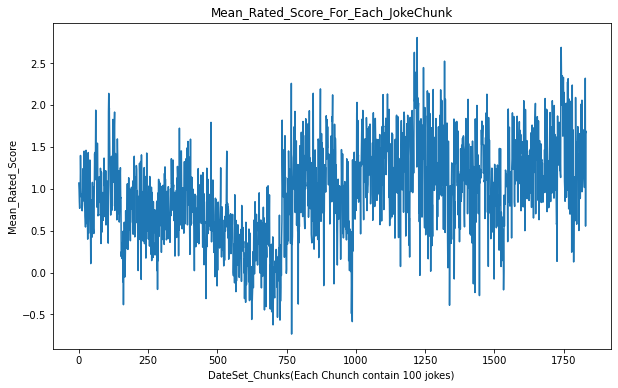

In [38]:
Avg_Each100jokes=[np.nanmean(dataset_rating100.iloc[i*100:(i+1)*100]) for i in range(int(dataset_rating100.shape[0]/100))]
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(np.arange(int(dataset_rating100.shape[0]/100)), Avg_Each100jokes)
ax.set_title("Mean_Rated_Score_For_Each_JokeChunk")
ax.set_xlabel("DateSet_Chunks(Each Chunch contain 100 jokes) ")
ax.set_ylabel("Mean_Rated_Score");

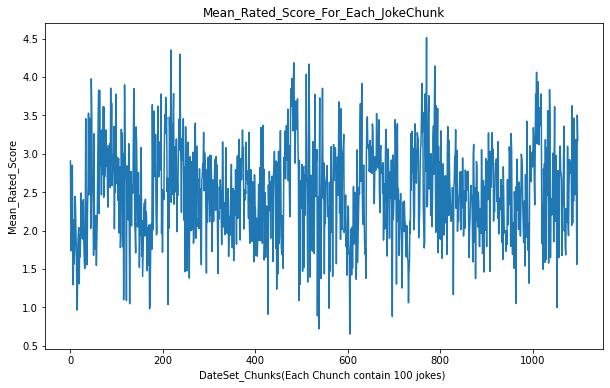

In [39]:
Avg_Each50jokes=[np.nanmean(dataset_rating50.iloc[i*100:(i+1)*100]) for i in range(int(dataset_rating50.shape[0]/100))]
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(np.arange(int(dataset_rating50.shape[0]/100)), Avg_Each50jokes)
ax.set_title("Mean_Rated_Score_For_Each_JokeChunk")
ax.set_xlabel("DateSet_Chunks(Each Chunch contain 100 jokes) ")
ax.set_ylabel("Mean_Rated_Score");

We can see that the data is in a wavy state, with no obvious upward or downward trend, so the data are independent of each other

## Step 4: Process the joke content to prepare the data for later content based analysis method

Broken down the jokes into the following 15 categories,the following categories are based on the joke content and access to online information.
#### Classification of jokes:[Classification represented by 15 units]
[Q/A format, medical, political, religious, race/nationality, career/profession, 
sex/relationships, about gender, in a bar, current events, pun/play on words, 
mothers/fathers, technology/science, animals, "screw in a lightbulb"]

In [143]:

joke_content = np.zeros((dataset_rating150.shape[1], 15))

joke_content[0] = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[1] = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[2] = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[3] = [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
joke_content[4] = [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
joke_content[5] = [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
joke_content[6] = [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]
joke_content[7] = [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[8] = [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
joke_content[9] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]
joke_content[10] = [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[11] = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[12] = [0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
joke_content[13] = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]
joke_content[14] = [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[15] = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
joke_content[16] = [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]
joke_content[17] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
joke_content[18] = [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[19] = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
joke_content[20] = [1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
joke_content[21] = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]
joke_content[22] = [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[23] = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
joke_content[24] = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
joke_content[25] = [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]
joke_content[26] = [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
joke_content[27] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]
joke_content[28] = [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]
joke_content[29] = [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[30] = [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]
joke_content[31] = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[32] = [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[33] = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[34] = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[35] = [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
joke_content[36] = [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
joke_content[37] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
joke_content[38] = [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
joke_content[39] = [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
joke_content[40] = [1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[41] = [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
joke_content[42] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]
joke_content[43] = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]
joke_content[44] = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
joke_content[45] = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[46] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[47] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[48] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[49] = [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[50] = [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]
joke_content[51] = [1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]
joke_content[52] = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]
joke_content[53] = [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[54] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]
joke_content[55] = [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]
joke_content[56] = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
joke_content[57] = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
joke_content[58] = [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[59] = [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[60] = [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
joke_content[61] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[62] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[63] = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[64] = [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
joke_content[65] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[66] = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]
joke_content[67] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[68] = [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
joke_content[69] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[70] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]
joke_content[71] = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[72] = [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
joke_content[73] = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
joke_content[74] = [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
joke_content[75] = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
joke_content[76] = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[77] = [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[78] = [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[79] = [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
joke_content[80] = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
joke_content[81] = [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]
joke_content[82] = [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
joke_content[83] = [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[84] = [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]
joke_content[85] = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]
joke_content[86] = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[87] = [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[88] = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[89] = [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1]
joke_content[90] = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0]
joke_content[91] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[92] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[93] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
joke_content[94] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
joke_content[95] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]
joke_content[96] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
joke_content[97] = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
joke_content[98] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
joke_content[99] = [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]
joke_content[100] = [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[101] = [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]
joke_content[102] = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[103] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[104] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[105] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[106] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[107] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[108] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[109] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[110] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[111] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
joke_content[112] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[113] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[114] = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[115] = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[116] = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[117] = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[118] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
joke_content[119] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
joke_content[120] = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[121] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[122] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
joke_content[123] = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[124] = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[125] = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[126] = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
joke_content[127] = [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[128] = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
joke_content[129] = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[130] = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[131] = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]
joke_content[132] = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[133] = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[134] = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[135] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
joke_content[136] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]
joke_content[137] = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[138] = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[139] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
joke_content[140] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
joke_content[141] = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[142] = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[143] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
joke_content[144] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
joke_content[145] = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[146] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[147] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[148] = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
joke_content[149] = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]




joke_content.shape

(150, 15)

### Feature word extraction:Remove meaningless and repetitive words

In [78]:
collected_words = []
redundant_words = ["the", "a", "be", "to", "of", "an", "in", "with", "at", "and", "have", "that", "i", "for", "or", "his", "her", "had"]
joke_lengths = np.zeros((dataset_rating150.shape[1]))#标记每个句子的单词数量
with open(Path+"Jestertext1(2).txt",encoding='gb18030', errors='ignore') as f:
    lines = f.read().split("\n")# 切成行
    for joke_index,joke in enumerate(lines):
        joke = re.sub(r'[^\w\s]', '', joke)  # 正则去符号
        joke = joke.lower()  # 小写
        joke_words = joke.split() # 切成单个单词
        joke_lengths[joke_index] = len(joke_words)
        for word in joke_words:
#              if word not in redundant_words and word not in collected_words:
                # Add word to the corpus. This way we have map of word_index/col_index -> word
            collected_words.append(word)

collected_words=list(set(collected_words).difference(set(redundant_words)))
collected_words=list(set(collected_words))

Using feature words represents each joke, and calculating IF_IDF

In [81]:
# TF-IDF computation
# TF-IDF：词频-逆文档频率Term Frequency-Inverse Document Frequency
# TF-IDF(tk,dj)=TF(tk,dj)*log(N/nk)

words_doc = np.ndarray((dataset_rating150.shape[1], len(collected_words)))
tfidf = np.ndarray((dataset_rating150.shape[1], len(collected_words)))
# Need to find how many documents each word is in.
with open(Path+"Jestertext1(2).txt",encoding='gb18030', errors='ignore') as f:
    jokes = f.read().split("\n")
    # for each joke, normalize by removing capitalization and puctuation
    for joke_index, joke in enumerate(jokes):
        joke = re.sub(r'[^\w\s]', '', joke)  # 正则去标点符号
        joke = joke.lower()  # 小写
        joke_words = joke.split()  #切成单词 
        for word in joke_words: # 特征表示：每条笑话用该笑话的词特征（在总的词库出现的频率）表示该该笑话
            if word in collected_words: 
                word_index = collected_words.index(word)
                words_doc[joke_index, word_index] += 1

TF = (words_doc.T / joke_lengths).T 
wordFre = np.sum(words_doc > 0, axis=0)#(5788,),统计每个词在文章中出现的频率

IDF = np.log(dataset_rating150.shape[1]/wordFre)#IDF计算公式

TF_IDF = TF * IDF


(150, 2279)

joint_joke_content--Features represent jokes: Using joke_content categories and TF_IDF to represent jokes

In [82]:
#特征表示笑话： joke_content分类表示笑话#    TF_IDF 用词特征化表示笑话
joint_joke_content = np.concatenate((joke_content, TF_IDF), axis=1)
joint_joke_content.shape#(150, 2279)

(150, 2294)

## Step 5: Methods 

### Method 1: The Collaborative System with Co-sinusoidal similarity analysis

In [144]:

def cosine_sim(new_user, dataframe):
  
    numerator = np.nansum(dataframe * new_user, axis=1)
    norm_user = np.sqrt(np.nansum(np.power(new_user, 2)))
    norm_df = np.sqrt(np.nansum(np.power(dataframe, 2), axis=1))
    cosine_sim = numerator / (norm_user * norm_df)
    coasine_sim = np.nan_to_num(cosine_sim)
    
    return coasine_sim


def get_most_similar(sim_scores, m):
    most_similar_scores = np.sort(sim_scores)[-m:]  # Gets the m most similar users
    most_similar_idxs = np.argsort(sim_scores)[-m:]  # Gets the indexes of the m most similar users
    return most_similar_scores, most_similar_idxs


def get_recommended_jokes(df_similar, top_sim_scores, n=5):
    predicted_ranks = np.nansum(df_similar.T * top_sim_scores, axis=1) / np.sum(top_sim_scores)
    pred_top_jokes = np.argsort(predicted_ranks)[-n:]
    return pred_top_jokes, predicted_ranks


def collaborative_recommendation(new_user, rank_matrix, m=20, n=5):

    cosine_sim_scores = cosine_sim(new_user, rank_matrix)
    most_sim_scores, most_sim_idxs = get_most_similar(cosine_sim_scores, m)
    df_sim = rank_matrix.iloc[most_sim_idxs].copy()
    top_jokes, predicted_ranks = get_recommended_jokes(df_sim, most_sim_scores, n)
    
    return top_jokes, predicted_ranks

In [145]:
new_user = data_rating.iloc[0]
jokes, ranks = collaborative_recommendation(new_user, data_rating, 20, 5)
print("The predicted top ranking jokes for this user are: \n{}".format(jokes+1))
print("The jokes actual rankings are:\n{}".format(data_rating.iloc[0, jokes]))

The predicted top ranking jokes for this user are: 
[27 54 35 65 29]
The jokes actual rankings are:
27    7.82
54    8.30
35    5.05
65    2.82
29    9.13
Name: 0, dtype: float64


In [146]:
num_users = 10
user_idxs = np.random.choice(data_rating.shape[0], num_users)
user_idxs

df_subsec = data_rating.iloc[user_idxs, -50:].copy()
m_values = np.arange(5, 205, 10)
RMSE_values = []
dataset_rating_test=data_rating.copy()
for m in m_values:
    rankings = dataset_rating_test.iloc[user_idxs].apply(lambda user: collaborative_recommendation(user, dataset_rating_test, m, 5), axis=1)    
    values = np.ndarray((rankings.size, 50))
    for idx, val in enumerate(rankings):

        values[idx] = val[1][-50:]
    results = (df_subsec - values).to_numpy()
    results_plot = results[~np.isnan(results)]
    RMSE = np.sqrt(np.sum(np.power(results_plot, 2)) / len(results_plot))
    RMSE_values.append(RMSE)

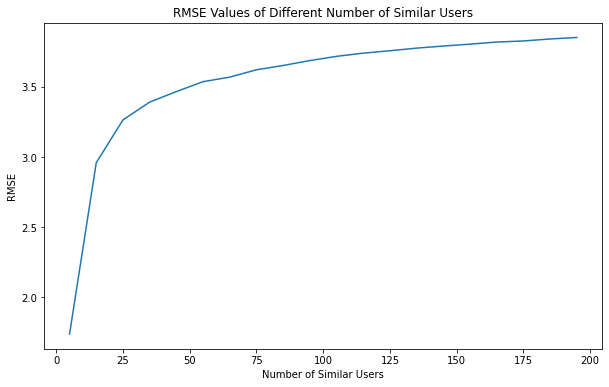

In [94]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(m_values, RMSE_values)
ax.set_title("RMSE Values of Different Number of Similar Users")
ax.set_xlabel("Number of Similar Users")
ax.set_ylabel("RMSE");

In [147]:
num_users = 10
user_idxs = np.random.choice(data_rating.shape[0], num_users)

df_subsec = data_rating.iloc[user_idxs, -50:].copy()#actual rankings


df_eval = data_rating.copy()
df_eval.iloc[user_idxs, -50:] = np.nan

collab_rankings = np.zeros((num_users, 50))
for iteration, user_idx in enumerate(user_idxs):
    new_user = df_eval.iloc[user_idx]
    _, pred_ranks = collaborative_recommendation(new_user, df_eval, 100, 5)
    collab_rankings[iteration] = pred_ranks[-50:]
    
# Calculate the difference between the predicted and actual rankings
collaborative_results = (df_subsec - collab_rankings).to_numpy()
# To plot a histogram, need to get rid of all the nans
collaborative_results_plot = collaborative_results[~np.isnan(collaborative_results)]

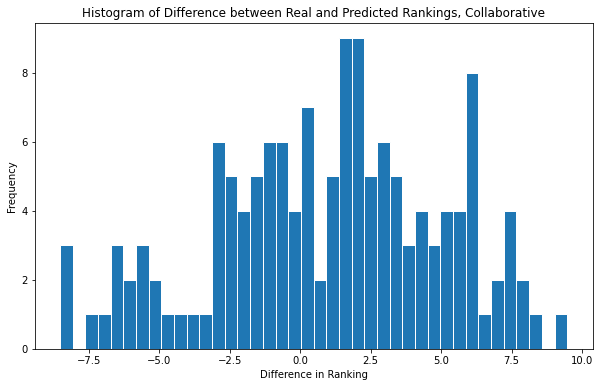

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.hist(collaborative_results_plot, bins=40, edgecolor="white")
ax.set_title("Histogram of Difference between Real and Predicted Rankings, Collaborative")
ax.set_xlabel("Difference in Ranking")
ax.set_ylabel("Frequency");

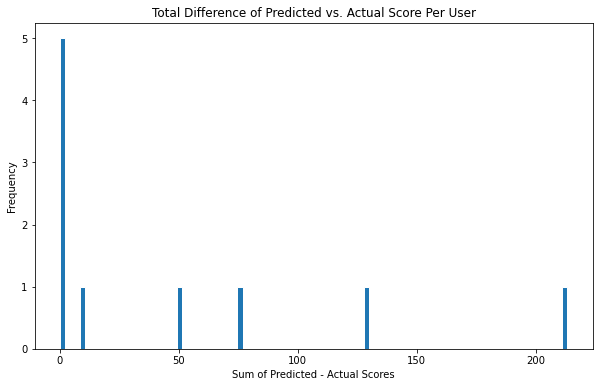

In [97]:
user_results = np.nansum(np.abs(collaborative_results), axis=1)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.hist(user_results, bins=100, edgecolor="white")
ax.set_title("Total Difference of Predicted vs. Actual Score Per User")
ax.set_xlabel("Sum of Predicted - Actual Scores")
ax.set_ylabel("Frequency");

In [98]:
RMSE_collab = np.sqrt(np.sum(np.power(collaborative_results_plot, 2)))

print("Collaborative System RMSE score: {}".format(np.round(RMSE_collab, 4)))

Collaborative System RMSE score: 50.1201


### Method 2:The Content-based System

In [99]:
def content_based_recommendation(new_user, joke_content, n=5):
    normalized_content = joke_content
    normalized_user = new_user - np.nanmean(new_user)

    user_matrix = normalized_content * normalized_user[:, np.newaxis]
    user_profile = np.nanmean(user_matrix, axis=0)

    norm_content = np.sqrt(np.nansum(np.power(normalized_content, 2), axis=1))
    norm_user = np.sqrt(np.nansum(np.power(user_profile, 2)))
    dot_product = np.nansum(normalized_content * user_profile.T, axis=1)
    
    pred_enjoyment = dot_product / (norm_content * norm_user)
    top_jokes = np.argsort(pred_enjoyment)[-n:]
    
    return top_jokes, pred_enjoyment

In [148]:
test_user = data_rating.iloc[0]
content_results_1, _ = content_based_recommendation(test_user, joint_joke_content, 5)

print("Using the hardcoded categories.")
print("The top jokes were {}.\nThe user rated these jokes as:\n{}".format(content_results_1, data_rating.iloc[0, content_results_1+1]))

Using the hardcoded categories.
The top jokes were [116  49  53 115   1].
The user rated these jokes as:
118     NaN
51    -8.69
55    -4.56
117     NaN
3     -9.66
Name: 0, dtype: float64


In [149]:
content_results_2, _ = content_based_recommendation(test_user, TF_IDF, 5)
print("Using the TF_IDF data.")
print("The top jokes were {}.\nThe user rated these jokes as:\n{}".format(content_results_2, data_rating.iloc[0, content_results_2]))

Using the TF_IDF data.
The top jokes were [28 58 26  1 33].
The user rated these jokes as:
29    9.13
59    2.82
27    7.82
2     8.79
34    7.82
Name: 0, dtype: float64


In [150]:
content_results_3, _ = content_based_recommendation(test_user, joint_joke_content, 5)
print("Using the joint categorical and TF_IDF data.")
print("The top jokes were {}.\nThe user rated these jokes as:\n{}".format(content_results_3, data_rating.iloc[0, content_results_3]))

Using the joint categorical and TF_IDF data.
The top jokes were [116  49  53 115   1].
The user rated these jokes as:
117     NaN
50     4.13
54     8.30
116     NaN
2      8.79
Name: 0, dtype: float64


In [112]:
def evaluate_content_system(num_users, rank_matrix, content_matrix, n=5):
    '''
    Function to evaluate different content-based systems. Returns a percentage for each user for the amount of correctly
    predicted signs of ranks (i.e. if both the predicted or actual were both positive or negative).
    
    :num_users: Integer for the number of users to test from the system
    :df: Pandas Dataframe of user rankings
    :cotent_matrix: Numppy NdArray of content ranking. Either the categorical matrix, TF_IDF, or the joint of the two.
    :n: Integer. The number of top jokes returned.
    
    :return: Numpy Array of length num_users. Each entry is the proportion of correctly classified  signs of jokes to total
             actual jokes evaluated.
    '''
    # Create a copy of a subsection of the user matrix
    np.random.seed(1234)
    user_idxs = np.random.choice(rank_matrix.shape[0], num_users)
    df_eval = rank_matrix.iloc[user_idxs].copy()

    # Calculate probablities that each user will like each joke
    eval_rankings = df_eval.apply(lambda row: content_based_recommendation(row, content_matrix, n), axis=1)

    # Predictions get returned in a jumbled form, so need to reformat to be useful.
    pred_jokes = np.ndarray((num_users, n))
    pred_values = np.ndarray((num_users, 150))
    for idx, val in enumerate(eval_rankings):
        pred_jokes[idx] = val[0]
        pred_values[idx] = val[1]

    # Determine correct and incorrect predictions based on if the both signs agree
    do_rankings_agree = np.sign(pred_values) * np.sign(df_eval.to_numpy())
    correct_rankings = np.nansum(do_rankings_agree == 1, axis=1)
    incorrect_rankings = np.nansum(do_rankings_agree == -1, axis=1)

    # Calculate the ratio of correctly predicted to total predicted
    percent_correct_per_user = correct_rankings / (correct_rankings + incorrect_rankings)
    percent_correct_plot = percent_correct_per_user[~np.isnan(percent_correct_per_user)]  # Remove nans so can plot results
    
    return percent_correct_plot, pred_jokes

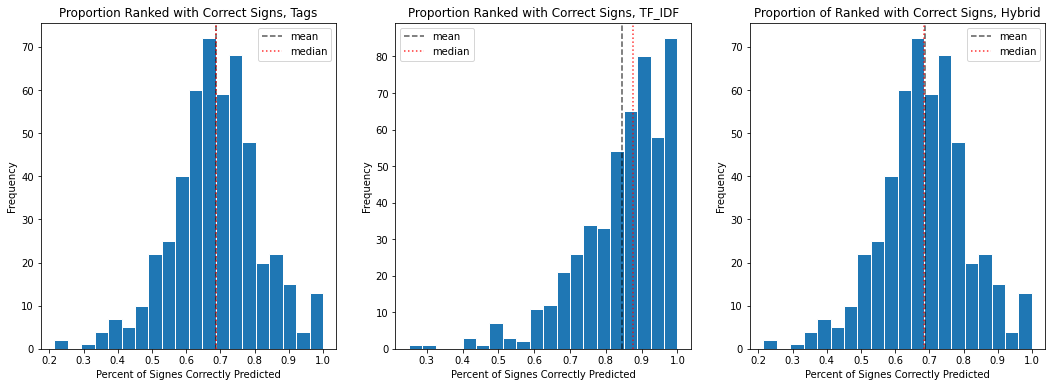

In [151]:
num_users = 500
results_categorical, jokes_categorical = evaluate_content_system(num_users, data_rating, joint_joke_content, 10)
results_tfidf, jokes_tfidf = evaluate_content_system(num_users, data_rating, TF_IDF, 10)
results_joint, jokes_joint = evaluate_content_system(num_users, data_rating, joint_joke_content, 10)


fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].hist(results_categorical, bins=20, edgecolor="white")
ax[0].axvline(np.mean(results_categorical), color="k", linestyle="dashed", alpha=0.65, label="mean")
ax[0].axvline(np.median(results_categorical), color="r", linestyle="dotted", alpha=0.8, label="median")
ax[0].set_xlabel("Percent of Signes Correctly Predicted")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Proportion Ranked with Correct Signs, Tags")
ax[0].legend();

ax[1].hist(results_tfidf, bins=20, edgecolor="white")
ax[1].axvline(np.mean(results_tfidf), color="k", linestyle="dashed", alpha=0.65, label="mean")
ax[1].axvline(np.median(results_tfidf), color="r", linestyle="dotted", alpha=0.8, label="median")
ax[1].set_xlabel("Percent of Signes Correctly Predicted")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Proportion Ranked with Correct Signs, TF_IDF")
ax[1].legend();

ax[2].hist(results_joint, bins=20, edgecolor="white")
ax[2].axvline(np.mean(results_joint), color="k", linestyle="dashed", alpha=0.65, label="mean")
ax[2].axvline(np.median(results_joint), color="r", linestyle="dotted", alpha=0.8, label="median")
ax[2].set_xlabel("Percent of Signes Correctly Predicted")
ax[2].set_ylabel("Frequency")
ax[2].set_title("Proportion of Ranked with Correct Signs, Hybrid")
ax[2].legend();

In [114]:
def evaluate_content_top_jokes(system_best_jokes, rank_matrix):
    '''
    
    '''
    num_users = system_best_jokes.shape[0]
    num_best_jokes = system_best_jokes.shape[1]
    
    np.random.seed(1234)
    user_idxs = np.random.choice(rank_matrix.shape[0], num_users)
    df_eval = rank_matrix.iloc[user_idxs].copy()
    df_eval = df_eval.to_numpy()
    
    # Find the highest ranked jokes by the user
    user_best_jokes = np.argsort(-df_eval)[:, :num_best_jokes]
    
    # Determine if the top jokes of the system are the top jokes of the user
    isin = np.zeros((num_users, num_best_jokes))
    for ii in range(num_users):
        isin[ii] = np.isin(system_best_jokes[ii], user_best_jokes[ii])
    
    # Calculate the proportion of jokes that were in both system and user top jokes
    isin_prop = np.sum(isin, axis=1) / num_best_jokes
    
    return isin_prop

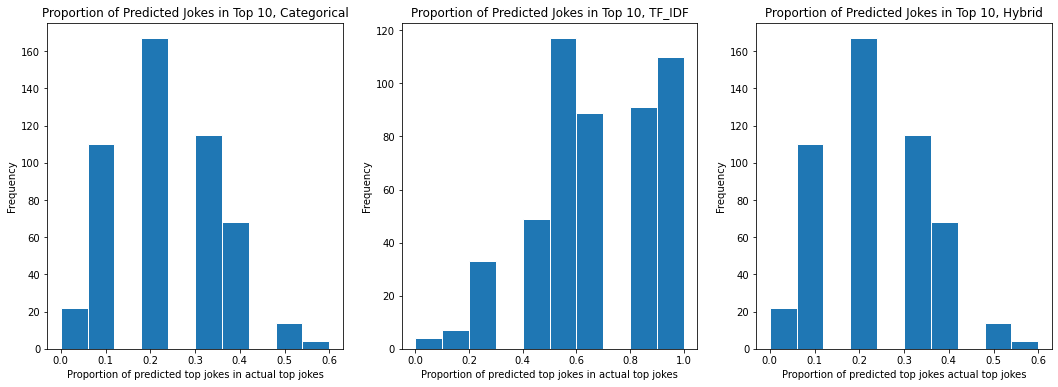

In [115]:
categorical_prop_correct = evaluate_content_top_jokes(jokes_categorical,data_rating )
tfidf_prop_correct = evaluate_content_top_jokes(jokes_tfidf, data_rating)
joint_prop_correct = evaluate_content_top_jokes(jokes_joint, data_rating)

num_jokes = jokes_categorical.shape[1]

# fig, ax = plt.subplots(3, 1, figsize=(10, 18))
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].hist(categorical_prop_correct, bins=10, edgecolor="white")
ax[0].set_title("Proportion of Predicted Jokes in Top {}, Categorical".format(num_jokes))
ax[0].set_xlabel("Proportion of predicted top jokes in actual top jokes")
ax[0].set_ylabel("Frequency")

ax[1].hist(tfidf_prop_correct, bins=10, edgecolor="white")
ax[1].set_title("Proportion of Predicted Jokes in Top {}, TF_IDF".format(num_jokes))
ax[1].set_xlabel("Proportion of predicted top jokes in actual top jokes")
ax[1].set_ylabel("Frequency")

ax[2].hist(joint_prop_correct, bins=10, edgecolor="white")
ax[2].set_title("Proportion of Predicted Jokes in Top {}, Hybrid".format(num_jokes))
ax[2].set_xlabel("Proportion of predicted top jokes actual top jokes")
ax[2].set_ylabel("Frequency");

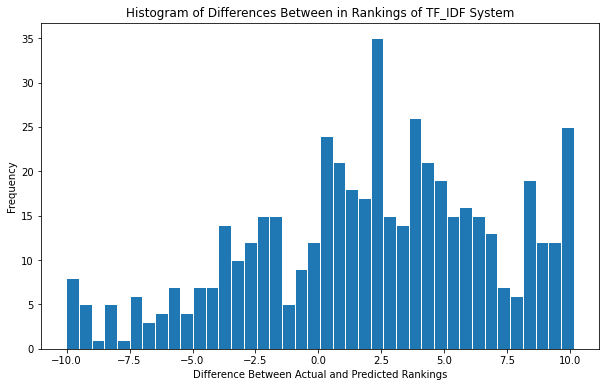

In [152]:
# How many users to compare
num_users_evaluated = 100
np.random.seed(1234)
user_idxs = np.random.choice(data_rating.shape[0], num_users_evaluated)
# Define a holdout set using the 50 of the jokes
df_eval = data_rating.copy()
df_subsec = data_rating.iloc[user_idxs, -50:].copy()
df_eval.iloc[user_idxs, -50:] = np.nan

# Calculate the predicted scores for each joke of each user in the holdout set
eval_preds = np.zeros((num_users_evaluated, 50))
for ii, user_idx in enumerate(user_idxs):
    new_user = df_eval.iloc[user_idx]
    # Calculate the scores using the TF_IDF system, because has been the best performing so far
    _, content_preds = content_based_recommendation(new_user, TF_IDF, 5)
    # Multiply the results by 10 to align the probability predictions with the actual ranking scale
    eval_preds[ii] = content_preds[-50:] * 10
    
eval_diff = np.array(df_subsec - eval_preds)
eval_diff_plot = eval_diff[~np.isnan(eval_diff)]

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.hist(eval_diff_plot, bins=40, edgecolor="white")
ax.set_title("Histogram of Differences Between in Rankings of TF_IDF System")
ax.set_xlabel("Difference Between Actual and Predicted Rankings")
ax.set_ylabel("Frequency");

In [117]:
RMSE_content = np.sqrt(np.sum(np.power(eval_diff_plot, 2)))

print("TF_IDF RMSE: {}".format(RMSE_content))

TF_IDF RMSE: 118.16267418914752


### Method 3 : The hybrid system

In [153]:
num_users_evaluated = 100
np.random.seed(1234)
user_idxs = np.random.choice(data_rating.shape[0], num_users_evaluated)
# Create a holdout set
df_eval = data_rating.copy()
df_subsec = data_rating.iloc[user_idxs, -50:].copy()
df_eval.iloc[user_idxs, -50:] = np.nan
# Calculate both the collaborative and content scores for each user in the holdout set, then get their average ranking
eval_preds = np.zeros((num_users_evaluated, 50))
for ii, user_idx in enumerate(user_idxs):
    new_user = df_eval.iloc[user_idx]
    _, collaborative_ranks = collaborative_recommendation(new_user, df_eval, 100, 5)
    _, content_preds = content_based_recommendation(new_user, TF_IDF, 5)
    # Take the average ranking of the collaborative and content results
    user_preds = (collaborative_ranks + (content_preds * 10)) / 2
    eval_preds[ii] = user_preds[-50:]

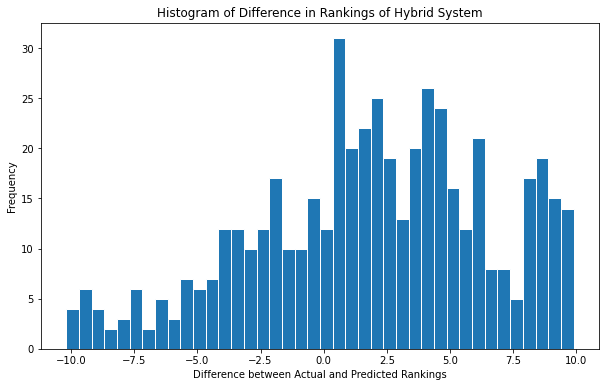

In [119]:
hybrid_results = np.array(df_subsec - eval_preds)
hybrid_results_plot = hybrid_results[~np.isnan(hybrid_results)]

# Plot the results
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.hist(hybrid_results_plot, bins=40, edgecolor="white")
ax.set_title("Histogram of Difference in Rankings of Hybrid System")
ax.set_xlabel("Difference between Actual and Predicted Rankings")
ax.set_ylabel("Frequency");

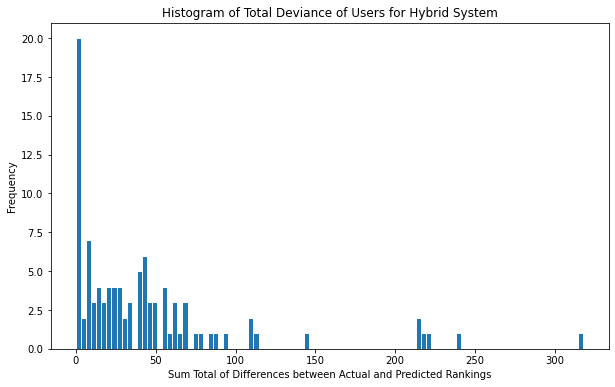

In [110]:
hybrid_user_deviance = np.nansum(np.abs(hybrid_results), axis=1)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.hist(hybrid_user_deviance, bins=100, edgecolor="white")
ax.set_title("Histogram of Total Deviance of Users for Hybrid System")
ax.set_xlabel("Sum Total of Differences between Actual and Predicted Rankings")
ax.set_ylabel("Frequency");

In [120]:
RMSE_hybrid = np.sqrt(np.sum(np.power(hybrid_results_plot, 2)))

print("RMSE for the hybrid system: {}".format(np.round(RMSE_hybrid, 4)))

RMSE for the hybrid system: 113.1651


## Step 6: The recommended results are obtained and the optimal model algorithm is selected

In [140]:
my_vector = np.repeat(np.nan, 150)
# Recall that the jokes are 1 indexed and the array is 0 indexed
# [7,8,13,15,16,17,18,19]

my_vector[6] = -3
my_vector[7] = 4
my_vector[12] = -8
my_vector[14] = -2
my_vector[15] = -3
my_vector[16] = 3
my_vector[17] = 1
my_vector[18] = 4

# Now we find the n most recommended jokes from each system
n = 5
# Collaborative System
_, collab_ranks = collaborative_recommendation(my_vector, data_rating, 40, n)
# Content-Based System (TF_IDF)
_, content_preds = content_based_recommendation(my_vector, TF_IDF, n)
# Hybrid System
hybrid_ranks = (collab_ranks + (content_preds * 10)) / 2

# Only want to see jokes that haven't been ranked already
collab_ranks[~np.isnan(my_vector)] = np.nan
content_preds[~np.isnan(my_vector)] = np.nan
hybrid_ranks[~np.isnan(my_vector)] = np.nan

# Find the top n jokes from each system
collab_joke_idx = np.argsort(-collab_ranks)[:n]
content_joke_idx = np.argsort(-content_preds)[:n]
hybrid_joke_idx = np.argsort(-hybrid_ranks)[:n]

In [128]:
print("n = {}".format(n))
print("The Collaborative System recommended jokes {}".format(collab_joke_idx + 1))
print("The Content-based System recommended jokes {}".format(content_joke_idx + 1))
print("The Hybrid System recommended jokes {}".format(hybrid_joke_idx + 1))

n = 5
The Collaborative System recommended jokes [ 72 105 132 133 117]
The Content-based System recommended jokes [124 101  85  51  64]
The Hybrid System recommended jokes [124 101  85  51  64]


In [154]:
my_vector = np.repeat(np.nan, 150)
my_vector[6] = 10
my_vector[16] = 10
my_vector[84] = 10
my_vector[39] = 10
my_vector[89] = 10

# Now we find the n most recommended jokes from each system
n = 5
# Collaborative System
_, collab_ranks = collaborative_recommendation(my_vector, data_rating, 40, n)
# Content-Based System (TF_IDF)
_, content_preds = content_based_recommendation(my_vector, TF_IDF, n)
# Hybrid System
hybrid_ranks = (collab_ranks + (content_preds * 10)) / 2

# Only want to see jokes that haven't been ranked already
collab_ranks[~np.isnan(my_vector)] = np.nan
content_preds[~np.isnan(my_vector)] = np.nan
hybrid_ranks[~np.isnan(my_vector)] = np.nan

# Find the top n jokes from each system
collab_joke_idx = np.argsort(-collab_ranks)[:n]
content_joke_idx = np.argsort(-content_preds)[:n]
hybrid_joke_idx = np.argsort(-hybrid_ranks)[:n]

In [155]:
print("n = {}".format(n))
#  Plus 1 to each index because want the joke num, not index in matrix
print("The Collaborative System recommended jokes {}".format(collab_joke_idx + 1))
print("The Content-based System recommended jokes {}".format(content_joke_idx + 1))
print("The Hybrid System recommended jokes {}".format(hybrid_joke_idx + 1))

n = 5
The Collaborative System recommended jokes [19 13 15 16 18]
The Content-based System recommended jokes [  1  97  98  99 100]
The Hybrid System recommended jokes [  1  97  98  99 100]


# Collaborative filtering has the lowest RSME value and minimum error.
# Select Collaborative filtering and recommend jokes [19 13 15 16 18]